<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2698]:
#Importation du fichier population.csv
population = pd.read_csv('../Source/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('../Source/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('../Source/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('../Source/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [2699]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [2700]:
#Consulter le nombre de colonnes
print(population.shape[1])
#La nature des données dans chacune des colonnes
population.info()
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.shape[0])


3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
1416


In [2701]:
#Affichage les 5 premières lignes de la table
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [2702]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

population['Valeur'] = population['Valeur'] * 1000
population['Valeur']


0       32269589.0
1       33370794.0
2       34413603.0
3       35383032.0
4       36296113.0
           ...    
1411    13586707.0
1412    13814629.0
1413    14030331.0
1414    14236595.0
1415    14438802.0
Name: Valeur, Length: 1416, dtype: float64

In [2703]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [2704]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [2705]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [2706]:
#Consulter le nombre de colonnes
dispo_alimentaire.shape[1]

18

In [2707]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [2708]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)


In [ ]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:, 3:5] = dispo_alimentaire.iloc[:, 3:5]*1000
dispo_alimentaire.iloc[:, 9:] = dispo_alimentaire.iloc[:, 9:]*1000
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2710]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [2711]:
#Afficher les dimensions du dataset
aide_alimentaire.shape

(1475, 4)

In [2712]:
#Consulter le nombre de colonnes
aide_alimentaire.shape[1]

4

In [2713]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [2714]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})
aide_alimentaire


,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [2715]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000
aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


In [2716]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [2717]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [2718]:
#Afficher les dimensions du dataset
sous_nutrition.shape
sous_nutrition


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [2719]:
#Consulter le nombre de colonnes
sous_nutrition.shape[1]
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [2720]:
#remplacer les valeurs 'NaN' par 0
sous_nutrition = sous_nutrition.fillna(0)

In [2721]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [2722]:
sous_nutrition.iloc[196:]

,Zone,Année,Valeur
196,Cabo Verde,2016-2018,<0.1
197,Cabo Verde,2017-2019,0.1
198,Cambodge,2012-2014,2.1
199,Cambodge,2013-2015,2.3
200,Cambodge,2014-2016,2.4
...,...,...,...
1213,Zimbabwe,2013-2015,0
1214,Zimbabwe,2014-2016,0
1215,Zimbabwe,2015-2017,0
1216,Zimbabwe,2016-2018,0


In [2723]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')


In [2724]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition = sous_nutrition.fillna(0)
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [2725]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})
sous_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [2726]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [2727]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [2728]:
#Je crée d'abord une dataframe sous_nutrition_2017 avec les données de 2017
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année']== '2016-2018',  :]
sous_nutrition_2017

,Zone,Année,sous_nutrition
4,Afghanistan,2016-2018,10500000.0
10,Afrique du Sud,2016-2018,3100000.0
16,Albanie,2016-2018,100000.0
22,Algérie,2016-2018,1300000.0
28,Allemagne,2016-2018,0.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2016-2018,8000000.0
1198,Viet Nam,2016-2018,6500000.0
1204,Yémen,2016-2018,0.0
1210,Zambie,2016-2018,0.0


In [2729]:
population_2017 = population.loc[population['Année'] == 2017, :]
population_2017

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [2730]:
population_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   Année       236 non-null    int64  
 2   Population  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [2731]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
pop_sous_nutrition_2017_join = pd.merge(sous_nutrition_2017, population_2017, on='Zone', how='left')


In [2732]:
#Affichage du dataset
pop_sous_nutrition_2017_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            203 non-null    object 
 1   Année_x         203 non-null    object 
 2   sous_nutrition  203 non-null    float64
 3   Année_y         203 non-null    int64  
 4   Population      203 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.1+ KB


In [2733]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pop_sous_nutrition_2017_join['proportion_pop_ss_nourris'] = round((pop_sous_nutrition_2017_join['sous_nutrition']/pop_sous_nutrition_2017_join['Population'])*(100), 2)
pop_sous_nutrition_2017_join

,Zone,Année_x,sous_nutrition,Année_y,Population,proportion_pop_ss_nourris
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.93
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.44
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.47
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.14
4,Allemagne,2016-2018,0.0,2017,82658409.0,0.00
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2016-2018,8000000.0,2017,29402484.0,27.21
199,Viet Nam,2016-2018,6500000.0,2017,94600648.0,6.87
200,Yémen,2016-2018,0.0,2017,27834819.0,0.00
201,Zambie,2016-2018,0.0,2017,16853599.0,0.00


In [2734]:
pop_sous_nutrition_2017_join_total = pop_sous_nutrition_2017_join.copy()

drop_colum_pop_sous_nutrition = ['Zone',
                                 'Année_x',
                                 'proportion_pop_ss_nourris']

pop_sous_nutrition_2017_join_total.drop(columns=drop_colum_pop_sous_nutrition, inplace=True)
pop_sous_nutrition_2017_join_total = pop_sous_nutrition_2017_join_total.groupby(['Année_y']).sum()
pop_sous_nutrition_2017_join_total['prop_ss_nourris_mondiale'] = round(pop_sous_nutrition_2017_join_total['sous_nutrition']/pop_sous_nutrition_2017_join_total['Population']*100,2)
pop_sous_nutrition_2017_join_total

,sous_nutrition,Population,prop_ss_nourris_mondiale
Année_y,,,
2017,535700000.0,7.543799e+09,7.1


7,1% de la population mondiale est en situation de sous_nutrition

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [2735]:
#Combien mange en moyenne un être humain ? Source => https://www.fao.org/faostat/fr/#data/FS

#2200 kcal / jours /personne
dispo_alimentaire.nunique()
population_2017.nunique()

Zone          236
Année           1
Population    236
dtype: int64

In [2736]:
#Chercher les pays qui n'ont pas la même appelation dans les deux fichiers
display(dispo_alimentaire.loc[dispo_alimentaire['Zone'].str.contains('Royaume-Uni')| dispo_alimentaire['Zone'].str.contains('Tchéquie')].drop_duplicates(subset='Zone'))
display(population_2017.loc[population_2017['Zone'].str.contains('Royaume-Uni')| population_2017['Zone'].str.contains('Tchéquie')])


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11450,Royaume-Uni,Abats Comestible,animale,0.0,0.0,7.0,1.99,0.20,0.89,126000.0,103000.0,67000.0,126000.0,0.0,162000.0,0.0,0.0,0.0
13665,Tchéquie (la),Abats Comestible,animale,0.0,0.0,10.0,3.07,0.29,1.53,33000.0,10000.0,23000.0,33000.0,0.0,20000.0,0.0,0.0,0.0


,Zone,Année,Population
1114,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727461.0
1306,Tchéquie,2017,10641034.0


In [2737]:
#remplacer les nom du Royaume Uni et la Tchéquie sur population avant de merger 
#car l'appellation est différente sur le fichier disponibilité

population_2017 = population_2017.replace("Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", "Royaume-Uni")
display(population_2017.loc[population_2017['Zone'] == 'Royaume-Uni'])
population_2017 = population_2017.replace("Tchéquie", "Tchéquie (la)")
display(population_2017.loc[population_2017['Zone'] == 'Tchéquie (la)'])

,Zone,Année,Population
1114,Royaume-Uni,2017,66727461.0


,Zone,Année,Population
1306,Tchéquie (la),2017,10641034.0


In [2738]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_dispo_alim = pd.merge(dispo_alimentaire, population_2017, how='left', on= 'Zone')

In [2739]:
#Affichage du nouveau dataframe
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [2740]:
#Supprimer les colonnes inutile dans dispo alimentaire
colonne_supprimer =['Produit',
'Origine', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']
df_dispo_alim_monde = df_dispo_alim.copy()
df_dispo_alim_monde = df_dispo_alim_monde.drop(columns=colonne_supprimer)
df_dispo_alim_monde

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,5.0,2017,36296113.0
1,Afghanistan,1.0,2017,36296113.0
2,Afghanistan,1.0,2017,36296113.0
3,Afghanistan,0.0,2017,36296113.0
4,Afghanistan,4.0,2017,36296113.0
...,...,...,...,...
15600,Îles Salomon,45.0,2017,636039.0
15601,Îles Salomon,11.0,2017,636039.0
15602,Îles Salomon,0.0,2017,636039.0
15603,Îles Salomon,0.0,2017,636039.0


In [2741]:
#Grouper les Pays + addition des dispo par pays
df_dispo_alim_monde = df_dispo_alim_monde.groupby(['Zone','Année','Population']).sum()
df_dispo_alim_monde.reset_index(inplace=True)
df_dispo_alim_monde

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2087.0
1,Afrique du Sud,2017,57009756.0,3020.0
2,Albanie,2017,2884169.0,3188.0
3,Algérie,2017,41389189.0,3293.0
4,Allemagne,2017,82658409.0,3503.0
...,...,...,...,...
169,Émirats arabes unis,2017,9487203.0,3275.0
170,Équateur,2017,16785361.0,2346.0
171,États-Unis d'Amérique,2017,325084756.0,3682.0
172,Éthiopie,2017,106399924.0,2129.0


Nous obtenons le nombre de kcal disponible par personne/jour dans chaque pays.

En 2017, en Afghanistan, la population est de 36 296 113 habitants, la disponibilité alimentaire est de 2087 kcal par personne et par jour. 

Nous allons maintenant ajouter une colonne qui rend compte de la dispo en kcal total du pays par jour 

Pour ce faire, nous allons faire le produit de la dispo alimentaire en kcal/personne/jour par le nombre d'habitant de ce pays, nous obtenons le nombre de kcal disponible par jour dans ce pays.

In [2742]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_dispo_alim_monde['dispo_kcal_jour'] = df_dispo_alim_monde['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_monde['Population']
df_dispo_alim_monde

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,Afghanistan,2017,36296113.0,2087.0,7.574999e+10
1,Afrique du Sud,2017,57009756.0,3020.0,1.721695e+11
2,Albanie,2017,2884169.0,3188.0,9.194731e+09
3,Algérie,2017,41389189.0,3293.0,1.362946e+11
4,Allemagne,2017,82658409.0,3503.0,2.895524e+11
...,...,...,...,...,...
169,Émirats arabes unis,2017,9487203.0,3275.0,3.107059e+10
170,Équateur,2017,16785361.0,2346.0,3.937846e+10
171,États-Unis d'Amérique,2017,325084756.0,3682.0,1.196962e+12
172,Éthiopie,2017,106399924.0,2129.0,2.265254e+11


Pour répondre à la question de la disponibilité en kcal au niveau mondial, nous allons préparer notre dataframe :

Nous avons besoin de la colonne Année, somme de Population, moyenne de disponibilité alimentaire, somme de dispo_kcal_jour

In [2743]:
#On supprime la colonne Zone pour faire notre groupby au niveau mondial
df_dispo_alim_monde = df_dispo_alim_monde.drop(columns='Zone')
df_dispo_alim_monde

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,2017,36296113.0,2087.0,7.574999e+10
1,2017,57009756.0,3020.0,1.721695e+11
2,2017,2884169.0,3188.0,9.194731e+09
3,2017,41389189.0,3293.0,1.362946e+11
4,2017,82658409.0,3503.0,2.895524e+11
...,...,...,...,...
169,2017,9487203.0,3275.0,3.107059e+10
170,2017,16785361.0,2346.0,3.937846e+10
171,2017,325084756.0,3682.0,1.196962e+12
172,2017,106399924.0,2129.0,2.265254e+11


In [2744]:
#On groupe toute nos données sur l'année 2017 avec une aggregation pour les autres colonnes
df_dispo_alim_monde = df_dispo_alim_monde.groupby(['Année']).agg({'Population': 'sum', 'Disponibilité alimentaire (Kcal/personne/jour)': 'mean', 'dispo_kcal_jour': 'sum'})
df_dispo_alim_monde = df_dispo_alim_monde.reset_index()
df_dispo_alim_monde

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,2017,7.369269e+09,2847.367816,2.118216e+13


On peut lire notre nouveau dataframe de la facon suivante :

Au niveau mondial, en 2017, La disponibilité alimentaire journalière est de 21.182.160.000.000 billiards de kcal

In [2745]:
#Calcul du nombre d'humains pouvant être nourris
df_dispo_alim_monde['humain_pouvant_être_nourri'] = df_dispo_alim_monde['dispo_kcal_jour']/2200
df_dispo_alim_monde


,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour,humain_pouvant_être_nourri
0,2017,7.369269e+09,2847.367816,2.118216e+13,9.628256e+09


Théoriquement, avec ce calcul, on constate que 9 628 256 000 d'humains sur terre peuvent être nourris chaque jours. Il resterait même de la disponibilité alimentaire excedentaire.

Essayons de mettre ce resultat sous forme de pourcentage :

In [2746]:
df_dispo_alim_monde['humain_pouvant_être_nourri'] = round((df_dispo_alim_monde['humain_pouvant_être_nourri']/df_dispo_alim_monde['Population'])*(100), 2)
df_dispo_alim_monde

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour,humain_pouvant_être_nourri
0,2017,7.369269e+09,2847.367816,2.118216e+13,130.65


In [2747]:
print("D'après nos calcules, chaque jour, nous pouvons nourrir 130,65% de la population mondiale.")

D'après nos calcules, chaque jour, nous pouvons nourrir 130,65% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [2748]:
df_dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0,2017,636039.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [2749]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_dispo_alim_vegetaux = df_dispo_alim.loc[df_dispo_alim['Origine'] == 'vegetale', :]
df_dispo_alim_vegetaux

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15596,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15597,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [2750]:
#Supprimer les colonnes inutile dans dispo alimentaire
colonne_supprimer_vegetaux =['Produit', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']

df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.drop(columns=colonne_supprimer_vegetaux)
df_dispo_alim_vegetaux

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
1,Afghanistan,vegetale,1.0,2017,36296113.0
2,Afghanistan,vegetale,1.0,2017,36296113.0
3,Afghanistan,vegetale,0.0,2017,36296113.0
4,Afghanistan,vegetale,4.0,2017,36296113.0
6,Afghanistan,vegetale,0.0,2017,36296113.0
...,...,...,...,...,...
15595,Îles Salomon,vegetale,0.0,2017,636039.0
15596,Îles Salomon,vegetale,0.0,2017,636039.0
15597,Îles Salomon,vegetale,0.0,2017,636039.0
15603,Îles Salomon,vegetale,0.0,2017,636039.0


In [2751]:
#Grouper les Pays + addition des dispo par pays
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.groupby(['Zone','Origine','Année','Population']).sum()
df_dispo_alim_vegetaux.reset_index(inplace=True)
df_dispo_alim_vegetaux

,Zone,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,vegetale,2017,36296113.0,1871.0
1,Afrique du Sud,vegetale,2017,57009756.0,2533.0
2,Albanie,vegetale,2017,2884169.0,2203.0
3,Algérie,vegetale,2017,41389189.0,2915.0
4,Allemagne,vegetale,2017,82658409.0,2461.0
...,...,...,...,...,...
169,Émirats arabes unis,vegetale,2017,9487203.0,2718.0
170,Équateur,vegetale,2017,16785361.0,1732.0
171,États-Unis d'Amérique,vegetale,2017,325084756.0,2698.0
172,Éthiopie,vegetale,2017,106399924.0,2005.0


Nous obtenons le nombre de kcal disponible par personne/jour dans chaque pays d'origine végétal .

En 2017, en Afghanistan, la population est de 36 296 113 habitants, la disponibilité alimentaire d'origie végétal est de 1871 kcal par personne et par jour. 

Nous allons maintenant ajouter une colonne qui rend compte de la dispo en kcal végétal du pays par jour 

Pour ce faire, nous allons faire le produit de la dispo alimentaire en kcal/personne/jour d'origine végétal par le nombre d'habitant de ce pays, nous obtenons le nombre de kcal d'origine vegetal disponible par jour dans ce pays.

In [2752]:
#Création de la colonne dispo_kcal_vegetaux avec calcul des kcal disponibles mondialement
df_dispo_alim_vegetaux['dispo_kcal_jour_vegetaux'] = df_dispo_alim_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_vegetaux['Population']
df_dispo_alim_vegetaux

,Zone,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_vegetaux
0,Afghanistan,vegetale,2017,36296113.0,1871.0,6.791003e+10
1,Afrique du Sud,vegetale,2017,57009756.0,2533.0,1.444057e+11
2,Albanie,vegetale,2017,2884169.0,2203.0,6.353824e+09
3,Algérie,vegetale,2017,41389189.0,2915.0,1.206495e+11
4,Allemagne,vegetale,2017,82658409.0,2461.0,2.034223e+11
...,...,...,...,...,...,...
169,Émirats arabes unis,vegetale,2017,9487203.0,2718.0,2.578622e+10
170,Équateur,vegetale,2017,16785361.0,1732.0,2.907225e+10
171,États-Unis d'Amérique,vegetale,2017,325084756.0,2698.0,8.770787e+11
172,Éthiopie,vegetale,2017,106399924.0,2005.0,2.133318e+11


Pour répondre à la question de la disponibilité en kcal d'origine végétal au niveau mondial, nous allons préparer notre dataframe :

Nous avons besoin de la colonne Origine, Année, somme de Population, moyenne de disponibilité alimentaire, somme de dispo_kcal_jour_végétaux

In [2753]:
#On supprime la colonne Zone pour faire notre groupby au niveau mondial
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.drop(columns='Zone')
df_dispo_alim_vegetaux

,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_vegetaux
0,vegetale,2017,36296113.0,1871.0,6.791003e+10
1,vegetale,2017,57009756.0,2533.0,1.444057e+11
2,vegetale,2017,2884169.0,2203.0,6.353824e+09
3,vegetale,2017,41389189.0,2915.0,1.206495e+11
4,vegetale,2017,82658409.0,2461.0,2.034223e+11
...,...,...,...,...,...
169,vegetale,2017,9487203.0,2718.0,2.578622e+10
170,vegetale,2017,16785361.0,1732.0,2.907225e+10
171,vegetale,2017,325084756.0,2698.0,8.770787e+11
172,vegetale,2017,106399924.0,2005.0,2.133318e+11


In [2754]:
#On groupe toute nos données sur l'année 2017 et Origine avec une aggregation pour les autres colonnes
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.groupby(['Année','Origine']).agg({'Population': 'sum', 'Disponibilité alimentaire (Kcal/personne/jour)': 'mean', 'dispo_kcal_jour_vegetaux': 'sum'})
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.reset_index()
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_vegetaux
0,2017,vegetale,7.369269e+09,2291.850575,1.744951e+13


On peut lire notre nouveau dataframe de la facon suivante :

Au niveau mondial, en 2017, La disponibilité alimentaire journalière végétal est de 17.449.510.000.000 billiards de kcal.

In [2755]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
df_dispo_alim_vegetaux['humain_pouvant_être_nourri'] = df_dispo_alim_vegetaux['dispo_kcal_jour_vegetaux']/2200
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_vegetaux,humain_pouvant_être_nourri
0,2017,vegetale,7.369269e+09,2291.850575,1.744951e+13,7.931595e+09


Théoriquement, avec ce calcul, on constate que 7 931 595 000 d'humains sur terre peuvent être nourris chaque jours unqiuement via la disponibilité alimentaire d'origine végétal. Il resterait même de la disponibilité alimentaire excedentaire.

Essayons de mettre ce resultat sous forme de pourcentage :

In [2756]:
df_dispo_alim_vegetaux['humain_pouvant_être_nourri'] = round((df_dispo_alim_vegetaux['humain_pouvant_être_nourri']/df_dispo_alim_vegetaux['Population'])*(100), 2)
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_vegetaux,humain_pouvant_être_nourri
0,2017,vegetale,7.369269e+09,2291.850575,1.744951e+13,107.63


In [2757]:
print("D'après nos calcules, chaque jour de l'année 2017, ")
print("nous pouvions nourrir 107,63% de la population mondiale avec la disponibilité alimentaire végétal.")

D'après nos calcules, chaque jour de l'année 2017, 
nous pouvions nourrir 107,63% de la population mondiale avec la disponibilité alimentaire végétal.


D'après nos calcules, chaque jour de l'année 2017, 
nous pouvions nourrir 107,63% de la population mondiale avec la disponibilité alimentaire végétal.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

La disponibilité totale intérieure est la quantité de produits comestible (exprimé en tonnes) disponible dans un territoire donnée.
Elle est le resultat du calcul suivant :

Disponibilité intérieur = Production + Importation - Exportation +/- Variation de stock

Cela ne veut pas dire que tout ces produits sont destinées à la consommation humaine. En effet, La disponibilité interieur va être redistribué de la facon suivante selon le type de produit et le pays concerné.

On aura plusieurs utilisation à la disponibilitée intérieur :
- Nourriture
- Les semences
- Les traitements
- Les Pertes
- L'Alimentation des animaux
- Les Autres utilisations

In [2758]:
#Calcul de la disponibilité totale
dispo_interieur_total = df_dispo_alim
dispo_interieur_total.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [2759]:
#Supprimer les colonnes inutile dans dispo interieur total
colonne_supprimer_dispo_total =['Produit', 
'Zone',
'Origine',
'Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Exportations - Quantité',
'Importations - Quantité',
'Production',
'Variation de stock',
'Population']

dispo_interieur_total = dispo_interieur_total.drop(columns=colonne_supprimer_dispo_total)
dispo_interieur_total = dispo_interieur_total.groupby(['Année']).sum()
dispo_interieur_total.reset_index(inplace=True)
display(dispo_interieur_total)
print("La disponibilité interieur total mondiale est de 9 848 994 000 tonnes")

,Année,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement
0,2017,1.304245e+09,865023000.0,9.848994e+09,4.876258e+09,453698000.0,154681000.0,2.204687e+09


La disponibilité interieur total mondiale est de 9 848 994 000 tonnes


In [2760]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [2761]:
#Création d'une liste avec toutes les variables
cereale_liste = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales','Céréales, Autres']
label_cereale_liste = ['Produit']
df_cereales = pd.DataFrame(cereale_liste, columns=label_cereale_liste)
df_cereales

,Produit
0,Blé
1,Riz (Eq Blanchi)
2,Orge
3,Maïs
4,Seigle
5,Avoine
6,Millet
7,Sorgho
8,Céréales
9,"Céréales, Autres"


In [2762]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
drop_column_cereale = ['Zone',
                       'Disponibilité alimentaire (Kcal/personne/jour)',
                       'Disponibilité alimentaire en quantité (kg/personne/an)',
                       'Disponibilité de matière grasse en quantité (g/personne/jour)',
                       'Disponibilité de protéines en quantité (g/personne/jour)',
                       'Année',
                       'Population',
                       'Variation de stock',
                       'Traitement',
                       'Produit',
                       'Autres Utilisations',
                       'Exportations - Quantité',
                       'Importations - Quantité',
                       'Pertes',
                       'Production',
                       'Semences']

dispo_cereale_total = pd.merge(df_dispo_alim, df_cereales, how='inner', on='Produit')
dispo_cereale_total.drop(columns=drop_column_cereale, inplace=True)
dispo_cereale_total


,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,vegetale,0.0,5992000.0,4895000.0
1,vegetale,37000.0,3316000.0,3174000.0
2,vegetale,18000.0,650000.0,440000.0
3,vegetale,545000.0,9461000.0,7270000.0
4,vegetale,7494000.0,16491000.0,6900000.0
...,...,...,...,...
1492,vegetale,59000.0,59000.0,0.0
1493,vegetale,14000.0,15000.0,0.0
1494,vegetale,2351000.0,4362000.0,236000.0
1495,vegetale,0.0,4156000.0,2401000.0


In [2763]:
#Affichage de la proportion d'alimentation animale
dispo_cereale_total = dispo_cereale_total.groupby(['Origine']).sum()
dispo_cereale_total = dispo_cereale_total.reset_index()
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,vegetale,873535000.0,2.406999e+09,1.029010e+09


In [2764]:
dispo_cereale_total['Proportion_alim_animaux'] = round((dispo_cereale_total['Aliments pour animaux']/dispo_cereale_total['Disponibilité intérieure'])*100,2)
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture,Proportion_alim_animaux
0,vegetale,873535000.0,2.406999e+09,1.029010e+09,36.29


36,29% de la disponibilité alimentaire mondiale en céréale est allouer à l'alimentation pour animaux

In [2765]:
dispo_cereale_total['Proportion_alim_humaine'] = round((dispo_cereale_total['Nourriture']/dispo_cereale_total['Disponibilité intérieure'])*100,2)
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture,Proportion_alim_animaux,Proportion_alim_humaine
0,vegetale,873535000.0,2.406999e+09,1.029010e+09,36.29,42.75


42,75% de la disponibilité alimentaire mondiale en céréale est allouer à l'alimentation humaine

In [2766]:
#Création d'un dataframe avec les informations uniquement pour ces céréales au détail
drop_column_cereale_detail = ['Zone',
                       'Disponibilité alimentaire (Kcal/personne/jour)',
                       'Disponibilité alimentaire en quantité (kg/personne/an)',
                       'Disponibilité de matière grasse en quantité (g/personne/jour)',
                       'Disponibilité de protéines en quantité (g/personne/jour)',
                       'Année',
                       'Population',
                       'Variation de stock',
                       'Traitement',
                       'Autres Utilisations',
                       'Exportations - Quantité',
                       'Importations - Quantité',
                       'Pertes',
                       'Origine',
                       'Production',
                       'Semences']

dispo_cereale_total_detail = pd.merge(df_dispo_alim, df_cereales, how='inner', on='Produit')
dispo_cereale_total_detail.drop(columns=drop_column_cereale_detail, inplace=True)
dispo_cereale_total_detail

,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,Blé,0.0,5992000.0,4895000.0
1,Blé,37000.0,3316000.0,3174000.0
2,Blé,18000.0,650000.0,440000.0
3,Blé,545000.0,9461000.0,7270000.0
4,Blé,7494000.0,16491000.0,6900000.0
...,...,...,...,...
1492,Sorgho,59000.0,59000.0,0.0
1493,Sorgho,14000.0,15000.0,0.0
1494,Sorgho,2351000.0,4362000.0,236000.0
1495,Sorgho,0.0,4156000.0,2401000.0


In [2767]:
#Affichage de la proportion d'alimentation animale
dispo_cereale_total_detail = dispo_cereale_total_detail.groupby(['Produit']).sum()
dispo_cereale_total_detail = dispo_cereale_total_detail.reset_index()
dispo_cereale_total_detail

,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,Avoine,16251000.0,23407000.0,3903000.0
1,Blé,129668000.0,679498000.0,457824000.0
2,"Céréales, Autres",19035000.0,27485000.0,5324000.0
3,Maïs,546116000.0,955799000.0,125184000.0
4,Millet,3306000.0,29911000.0,23040000.0
5,Orge,92658000.0,140439000.0,6794000.0
6,Riz (Eq Blanchi),33594000.0,475656000.0,377286000.0
7,Seigle,8099000.0,16567000.0,5502000.0
8,Sorgho,24808000.0,58237000.0,24153000.0


In [2768]:
dispo_cereale_total_detail['Prop_alim_animaux'] = round((dispo_cereale_total_detail['Aliments pour animaux']/dispo_cereale_total_detail['Disponibilité intérieure'])*100,2)
dispo_cereale_total_detail['Propn_alim_humaine'] = round((dispo_cereale_total_detail['Nourriture']/dispo_cereale_total_detail['Disponibilité intérieure'])*100,2)
dispo_cereale_total_detail


,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture,Prop_alim_animaux,Propn_alim_humaine
0,Avoine,16251000.0,23407000.0,3903000.0,69.43,16.67
1,Blé,129668000.0,679498000.0,457824000.0,19.08,67.38
2,"Céréales, Autres",19035000.0,27485000.0,5324000.0,69.26,19.37
3,Maïs,546116000.0,955799000.0,125184000.0,57.14,13.10
4,Millet,3306000.0,29911000.0,23040000.0,11.05,77.03
5,Orge,92658000.0,140439000.0,6794000.0,65.98,4.84
6,Riz (Eq Blanchi),33594000.0,475656000.0,377286000.0,7.06,79.32
7,Seigle,8099000.0,16567000.0,5502000.0,48.89,33.21
8,Sorgho,24808000.0,58237000.0,24153000.0,42.60,41.47


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [2769]:
#Création de la colonne proportion par pays
pop_sous_nutrition_2017_join

,Zone,Année_x,sous_nutrition,Année_y,Population,proportion_pop_ss_nourris
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.93
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.44
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.47
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.14
4,Allemagne,2016-2018,0.0,2017,82658409.0,0.00
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2016-2018,8000000.0,2017,29402484.0,27.21
199,Viet Nam,2016-2018,6500000.0,2017,94600648.0,6.87
200,Yémen,2016-2018,0.0,2017,27834819.0,0.00
201,Zambie,2016-2018,0.0,2017,16853599.0,0.00


In [2770]:
#affichage après trie des 10 pires pays
pop_sous_nutrition_2017_join
pop_sous_nutrition_2017_join = pop_sous_nutrition_2017_join.sort_values(by='proportion_pop_ss_nourris', ascending=False)
df_pop_sous_nutrition_2017_top10 = pop_sous_nutrition_2017_join.head(10)
df_pop_sous_nutrition_2017_top10
df_pop_sous_nutrition_2017_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)

/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/82764781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_sous_nutrition_2017_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Haïti'),
  Text(1, 0, 'Corée du Nord'),
  Text(2, 0, 'Madagascar'),
  Text(3, 0, 'Libéria'),
  Text(4, 0, 'Lesotho'),
  Text(5, 0, 'Tchad'),
  Text(6, 0, 'Rwanda'),
  Text(7, 0, 'Mozambique'),
  Text(8, 0, 'Timor-Leste'),
  Text(9, 0, 'Afghanistan')])

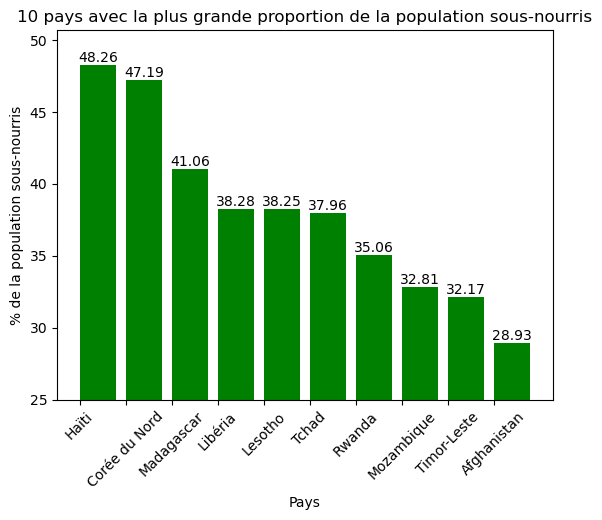

In [2771]:
graphe_top10 = plt.bar(height=df_pop_sous_nutrition_2017_top10['proportion_pop_ss_nourris'],color='green' ,x=df_pop_sous_nutrition_2017_top10['Zone'], align='edge')
plt.bar_label(graphe_top10, fmt='%.2f', label_type='edge')
plt.title('10 pays avec la plus grande proportion de la population sous-nourris')
plt.xlabel('Pays')
plt.ylabel('% de la population sous-nourris')
plt.ylim(25)
plt.xticks(rotation=45)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [2772]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_total = aide_alimentaire.copy()
aide_alimentaire_total = aide_alimentaire_total.drop(columns=['Année', 'Produit'])
aide_alimentaire_total = aide_alimentaire_total.groupby(['Zone']).sum()
aide_alimentaire_total = aide_alimentaire_total.reset_index()
aide_alimentaire_total

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [2773]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alimentaire_total.sort_values(by='Valeur', ascending=False, inplace=True)
top_10_aide_alim = aide_alimentaire_total.head(10)
top_10_aide_alim.replace('République arabe syrienne', 'Syrie', inplace=True)
top_10_aide_alim.replace('République démocratique du Congo', 'RDC', inplace=True)
top_10_aide_alim


/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/90534056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_aide_alim.replace('République arabe syrienne', 'Syrie', inplace=True)
/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/90534056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_aide_alim.replace('République démocratique du Congo', 'RDC', inplace=True)


,Zone,Valeur
50,Syrie,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,RDC,288502000
43,Niger,276344000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Syrie'),
  Text(1, 0, 'Éthiopie'),
  Text(2, 0, 'Yémen'),
  Text(3, 0, 'Soudan du Sud'),
  Text(4, 0, 'Soudan'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'Somalie'),
  Text(8, 0, 'RDC'),
  Text(9, 0, 'Niger')])

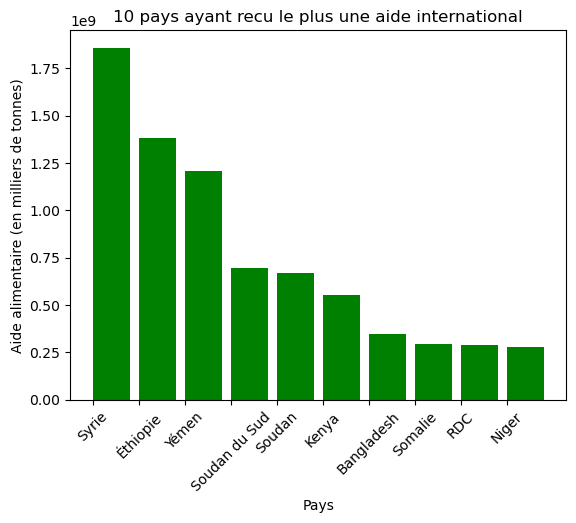

In [2774]:
top_10_aide_alim = plt.bar(height=top_10_aide_alim['Valeur'],color='green' ,x=top_10_aide_alim['Zone'], align='edge')
plt.title('10 pays ayant recu le plus une aide international')
plt.xlabel('Pays')
plt.ylabel('Aide alimentaire (en milliers de tonnes)')
plt.xticks(rotation=45)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [2775]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_evolution = aide_alimentaire.copy()
aide_alimentaire_evolution = aide_alimentaire_evolution.drop(columns='Produit')
aide_alimentaire_evolution = aide_alimentaire_evolution.groupby(['Zone', 'Année']).sum()
aide_alimentaire_evolution = aide_alimentaire_evolution.reset_index()
aide_alimentaire_evolution

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [2776]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
beneficiaire_principal_aide = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [2777]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_evolution = aide_alimentaire_evolution.loc[aide_alimentaire_evolution['Zone'].isin(beneficiaire_principal_aide)]
aide_alimentaire_evolution

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [2778]:
aide_alim_group = aide_alimentaire_evolution.copy()
aide_alim_group = aide_alim_group.groupby(['Zone','Année']).sum()
aide_alim_group.reset_index(inplace=True)
aide_alim_group

,Zone,Année,Valeur
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


In [2779]:
# Affichage des pays avec l'aide alimentaire par année
evolution_aide = aide_alimentaire_evolution.pivot_table(index='Année', columns='Zone', values='Valeur')
evolution_aide.reset_index(inplace=True)
evolution_aide

Zone,Année,République arabe syrienne,Soudan,Soudan du Sud,Yémen,Éthiopie
0,2013,563566000.0,330230000.0,196330000.0,264764000.0,591404000.0
1,2014,651870000.0,321904000.0,450610000.0,103840000.0,586624000.0
2,2015,524949000.0,17650000.0,48308000.0,372306000.0,203266000.0
3,2016,118558000.0,NaN,NaN,465574000.0,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


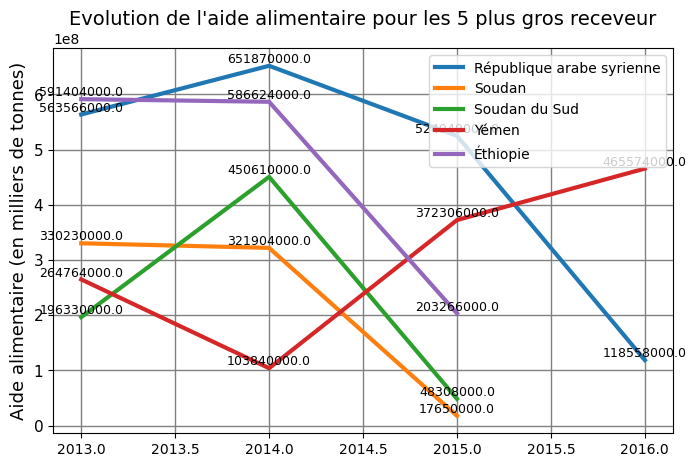

In [2780]:
plt.figure(figsize=(8, 5))
plt.plot(evolution_aide['Année'], evolution_aide['République arabe syrienne'], label='République arabe syrienne', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Soudan'], label='Soudan', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Soudan du Sud'], label='Soudan du Sud', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Yémen'], label='Yémen', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Éthiopie'], label='Éthiopie', linewidth=3)

for index, row in evolution_aide.iterrows():
    plt.text(row['Année'], row['République arabe syrienne'] + 1, str(row['République arabe syrienne']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Soudan'] + 1, str(row['Soudan']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Soudan du Sud'] + 1, str(row['Soudan du Sud']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Yémen'] + 1, str(row['Yémen']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Éthiopie'] + 1, str(row['Éthiopie']), ha='center', va='bottom', fontsize=9)

plt.legend(loc='upper right')
plt.ylabel('Aide alimentaire (en milliers de tonnes)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution de l'aide alimentaire pour les 5 plus gros receveur", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [2781]:
#Calcul de la disponibilité en kcal par personne par jour par pays
colonne_supprimer_dispo_hab =['Produit',
'Origine', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']

df_dispo_alim_moins = df_dispo_alim.copy()
df_dispo_alim_moins = df_dispo_alim_moins.drop(columns=colonne_supprimer_dispo_hab)
df_dispo_alim_moins = df_dispo_alim_moins.groupby(['Zone','Année','Population']).sum()
df_dispo_alim_moins.reset_index(inplace=True)
df_dispo_alim_moins

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2087.0
1,Afrique du Sud,2017,57009756.0,3020.0
2,Albanie,2017,2884169.0,3188.0
3,Algérie,2017,41389189.0,3293.0
4,Allemagne,2017,82658409.0,3503.0
...,...,...,...,...
169,Émirats arabes unis,2017,9487203.0,3275.0
170,Équateur,2017,16785361.0,2346.0
171,États-Unis d'Amérique,2017,325084756.0,3682.0
172,Éthiopie,2017,106399924.0,2129.0


In [2782]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
df_dispo_alim_moins.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True, inplace=True)
pays_moins_dispo_top10 = df_dispo_alim_moins.head(10)
pays_moins_dispo_top10

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,2017,4596023.0,1879.0
166,Zambie,2017,16853599.0,1924.0
91,Madagascar,2017,25570512.0,2056.0
0,Afghanistan,2017,36296113.0,2087.0
65,Haïti,2017,10982366.0,2089.0
133,République populaire démocratique de Corée,2017,25429825.0,2093.0
151,Tchad,2017,15016753.0,2109.0
167,Zimbabwe,2017,14236595.0,2113.0
114,Ouganda,2017,41166588.0,2126.0
154,Timor-Leste,2017,1243258.0,2129.0


/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/3540695391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_moins_dispo_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)
/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/3540695391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_moins_dispo_top10.replace('République centrafricaine', 'R.centrafricaine', inplace=True)


(1850.0, 2235.45)

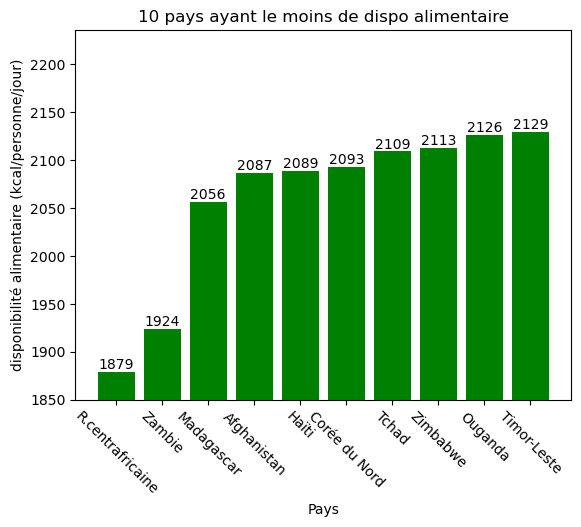

In [2783]:
pays_moins_dispo_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)
pays_moins_dispo_top10.replace('République centrafricaine', 'R.centrafricaine', inplace=True)

pays_moins_dispo_top10 = plt.bar(height=pays_moins_dispo_top10['Disponibilité alimentaire (Kcal/personne/jour)'],color='green' ,x=pays_moins_dispo_top10['Zone'], align='center')
plt.bar_label(pays_moins_dispo_top10, fmt='%d', label_type='edge')

plt.title('10 pays ayant le moins de dispo alimentaire')
plt.xlabel('Pays')
plt.ylabel('disponibilité alimentaire (kcal/personne/jour)')
plt.xticks(rotation=-45)
plt.ylim(1850)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [2784]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
df_dispo_alim_moins.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False, inplace=True)
pays_plus_dispo_top10 = df_dispo_alim_moins.head(10)
pays_plus_dispo_top10

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819901.0,3770.0
16,Belgique,2017,11419748.0,3737.0
159,Turquie,2017,81116450.0,3708.0
171,États-Unis d'Amérique,2017,325084756.0,3682.0
74,Israël,2017,8243848.0,3610.0
72,Irlande,2017,4753279.0,3602.0
75,Italie,2017,60673701.0,3578.0
89,Luxembourg,2017,591910.0,3540.0
168,Égypte,2017,96442591.0,3518.0
4,Allemagne,2017,82658409.0,3503.0


/var/folders/75/1ffttkv52sv3447dlb59t6nc0000gn/T/ipykernel_80087/2334254516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_plus_dispo_top10.replace("États-Unis d'Amérique", "USA", inplace=True)


(3400.0, 3958.5)

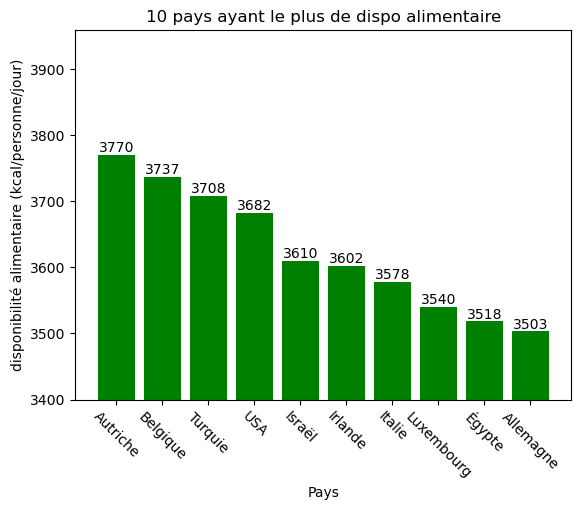

In [2785]:
pays_plus_dispo_top10.replace("États-Unis d'Amérique", "USA", inplace=True)

pays_plus_dispo_top10 = plt.bar(height=pays_plus_dispo_top10['Disponibilité alimentaire (Kcal/personne/jour)'],color='green' ,x=pays_plus_dispo_top10['Zone'], align='center')
plt.bar_label(pays_plus_dispo_top10, fmt='%d', label_type='edge')

plt.title('10 pays ayant le plus de dispo alimentaire')
plt.xlabel('Pays')
plt.ylabel('disponibilité alimentaire (kcal/personne/jour)')
plt.xticks(rotation=-45)
plt.ylim(3400)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [2786]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alimentaire_thailande_manioc = dispo_alimentaire.copy()
dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande_manioc.loc[(dispo_alimentaire_thailande_manioc['Zone'] == 'Thaïlande') & (dispo_alimentaire_thailande_manioc['Produit'] == 'Manioc')]
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [2787]:
#Calcul de la sous nutrition en Thaïlande
pop_sous_nutrition_2017_thailande = pop_sous_nutrition_2017_join.loc[pop_sous_nutrition_2017_join['Zone'] == 'Thaïlande']
pop_sous_nutrition_2017_thailande

,Zone,Année_x,sous_nutrition,Année_y,Population,proportion_pop_ss_nourris
185,Thaïlande,2016-2018,6200000.0,2017,69209810.0,8.96


In [2788]:
#Supprimer colonne inutile Manioc
colonne_supprimer_manioc =[ 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Nourriture',
'Pertes',
'Semences',
'Traitement']
dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande_manioc.drop(columns=colonne_supprimer_manioc)
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
13809,Thaïlande,Manioc,vegetale,6264000.0,25214000.0,1250000.0,30228000.0,0.0


In [2789]:
# On calcule la proportion exportée en fonction de la proportion
dispo_alimentaire_thailande_manioc['proportion_export_manioc'] = round(dispo_alimentaire_thailande_manioc['Exportations - Quantité']/dispo_alimentaire_thailande_manioc['Production']*100,2)
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,proportion_export_manioc
13809,Thaïlande,Manioc,vegetale,6264000.0,25214000.0,1250000.0,30228000.0,0.0,83.41


83,41% de la production du Manioc est dédié à l'exportation.

Reprenons les informations que nous avons:

Pour avoir la disponibilité intérieur, nous avons le calcul suivant :
Production + Importation - exportation -+ Variation de stock
30 228 000 + 1 250 000 - 25 214 000 + 0 = 6 264 000 

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [ ]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

#Rajouter le soja
#La liste des céréales est difficile a trouver ...